movies_dataset数据分析
=
github地址：https://github.com/zhxcorner/datamining

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv(r'D:\Item\Desktop\数据挖掘\movies_dataset.csv', index_col=0)
data.head(10)

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
5,5.4,NaN,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,"2,940","Srinivas Gavireddy, Mayukh Adithya"
6,NaN,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,"11,978",NaN
7,6.5,R,Benjamin Caron,"1,781",371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka"
8,6.9,PG-13,Ravi Kapoor,458,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor
9,4.2,NaN,Danny LeGare,"1,965",372041,Hollywood / English,English,"18 Feb, 2023",Feb 07 2023,80,A\r\n family moves back to a farm in the mothe...,Blood Harvest,"9,710","Michael Hultquist, Danny LeGare, Seth Metoyer"


数据摘要和可视化
=
数据摘要
-
### 标称属性  
给出每个可能取值的频数

In [3]:
col_nominal_attribute = ['IMDb-rating', 'downloads', 'id', 'run_time', 'views']
col_numeric_attribute = ['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'storyline', 'title', 'writer']

In [4]:
for col in col_numeric_attribute:
    frequency=data[col].value_counts()
    print(frequency)
    print('===========================================================')

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay             

### 数值属性  
给出5数概括及缺失值的个数

run_time列中存在xxhxxmin的数据，需要统一转换为分钟

In [5]:
# data= pd.read_csv(r'D:\Item\Desktop\数据挖掘\movies_dataset.csv', index_col=0)
data['run_time'].head(10)

0         105
1          84
2    1h 47min
3         139
4         122
5         131
6         200
7         116
8          80
9          80
Name: run_time, dtype: object

In [6]:
for i, row in enumerate(data['run_time']):
    if not pd.isna(row):
        minutes = 0
        row = str(row)
        if 'min' in row and 'h' in row:
            hour, minute = row.split("h ")
            minutes = (60 * int(hour)) + int(minute.strip("min"))
        elif 'm' in row and 'h' in row:
            hour, minute = row.split("h ")
            minutes = (60 * int(hour)) + int(minute.strip("m"))    
        elif 'h' in row:
            minutes = (60 * int(row.strip("h")))
        elif 'min' in row:
            minutes = int(row.strip(" min"))
        else:
            minutes = row
        data.loc[i, 'run_time'] = minutes
data['run_time'].head(10)

0    105
1     84
2    107
3    139
4    122
5    131
6    200
7    116
8     80
9     80
Name: run_time, dtype: object

views、downloads中千位数会带逗号，需要删去

In [7]:
data[['downloads', 'views']].head(10)

,downloads,views
0,304,"2,794"
1,73,"1,002"
2,"1,427","14,419"
3,"1,549","4,878"
4,657,"2,438"
5,746,"2,940"
6,"5,332","11,978"
7,"1,781","18,225"
8,458,"6,912"
9,"1,965","9,710"


In [8]:
for col in ['downloads', 'views']:
    for i, row in enumerate(data[col]):
        if not pd.isna(row):
            if ',' in row:
                data.loc[i, col] = row.replace(",","")

In [9]:
data[['downloads', 'views']].head(10)

,downloads,views
0,304,2794
1,73,1002
2,1427,14419
3,1549,4878
4,657,2438
5,746,2940
6,5332,11978
7,1781,18225
8,458,6912
9,1965,9710


查看各列数据类型，将数值属性数据类型转换为可计算类型float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  object 
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  object 
 13  writer           18356 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.9+ MB


In [11]:
data[['downloads', 'run_time', 'views']] = data[['downloads', 'run_time', 'views']].apply(pd.to_numeric)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  float64
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  float64
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  float64
 13  writer           18356 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


通过describe函数输出5数概括信息

In [13]:
for col in col_nominal_attribute:
    print(data[col].astype('float').describe())
    print('===========================================================')

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64
count     20548.000000
mean     222351.199776
std      138422.327931
min           1.000000
25%       96122.250000
50%      264457.500000
75%      354561.250000
max      372092.000000
Name: id, dtype: float64
count    18780.000000
mean       106.195953
std         23.636432
min          2.000000
25%         90.000000
50%        100.000000
75%        117.000000
max        321.000000
Name: run_time, dtype: float64
count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.522200e+04
75%      3.657100e+04
max 

查看缺失值个数

In [14]:
data.isnull().sum()

IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

数据可视化
-
使用直方图、盒图等检查数据分布及离群点

array([[<Axes: title={'center': 'IMDb-rating'}>,
        <Axes: title={'center': 'downloads'}>],
       [<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'run_time'}>],
       [<Axes: title={'center': 'views'}>, <Axes: >]], dtype=object)

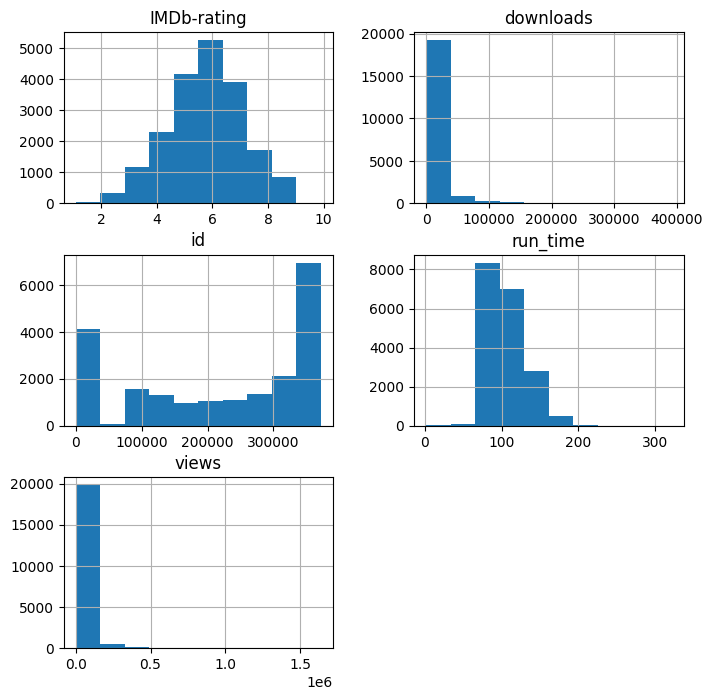

In [15]:
data.hist(figsize=(8, 8))

<Axes: >

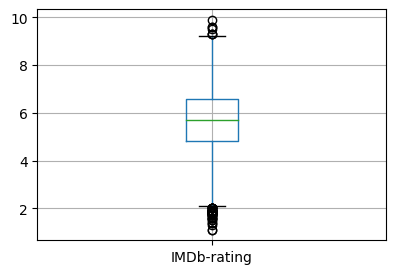

In [16]:
data[[col_nominal_attribute[0]]].boxplot(figsize=(4.5, 3))

<Axes: >

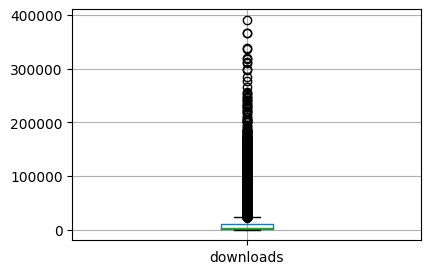

In [17]:
data[[col_nominal_attribute[1]]].boxplot(figsize=(4.5, 3))

<Axes: >

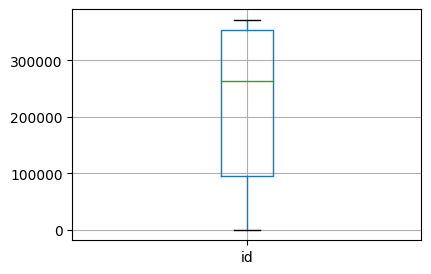

In [18]:
data[[col_nominal_attribute[2]]].boxplot(figsize=(4.5, 3))

<Axes: >

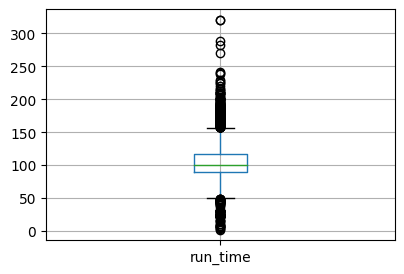

In [19]:
data[[col_nominal_attribute[3]]].boxplot(figsize=(4.5, 3))

<Axes: >

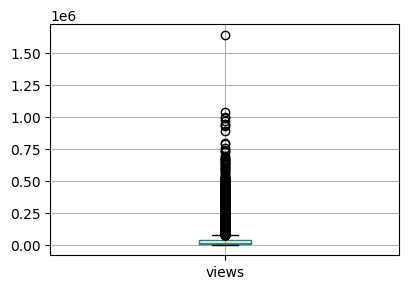

In [20]:
data[[col_nominal_attribute[4]]].boxplot(figsize=(4.5, 3))

**从以上直方图以及盒图可以看出：**  
IMDB-rating基本符合正态分布情况，离群值较少，较小值一侧更多，分布呈左偏态  
downloads不符合正态分布情况，有较多离群值，且集中在较大值一侧，分布呈右偏态  
id不符合正态分布情况，没有出现离群值  
run_time不符合正态分布情况，有较多离群值，较大值一侧更多，分布呈右偏态
views不符合正态分布情况，有较多离群值，且集中在较大值一侧，分布呈右偏态

数据缺失的处理
=
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:  
1. 将缺失部分剔除  
2. 用最高频率值来填补缺失值  
3. 通过属性的相关关系来填补缺失值  
4. 通过数据对象之间的相似性来填补缺失值  

In [21]:
data.isnull().sum()

IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

查看个别缺失数据情况，缺失信息过多，可能人为误操作原因产生，采取直接剔除方式

In [22]:
data[data['downloads'].isnull()]

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
149,7.1,NaN,NaN,NaN,371111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data=data.drop(data[data['downloads'].isnull()].index)
data.isnull().sum()

IMDb-rating         841
appropriate_for    9475
director           1937
downloads             0
id                    0
industry              0
language            541
posted_date           0
release_date          0
run_time           1767
storyline          1700
title                 0
views                 0
writer             2191
dtype: int64

剩下存在缺失值属性的含义分别为  
IMDb-rating: IMDB评级  
appropriate_for: 电影评级，R级、PG-13级，等等  
language: 语言  
run_time：电影时长  
director：导演名  
writer：编剧名  
storyline: 故事简介      

其中storyline由于电影剧情的特殊性，无法通过其他方式进行填补，选择剔除处理

In [24]:
data=data.drop(data[data['storyline'].isnull()].index)
data.isnull().sum()

IMDb-rating         106
appropriate_for    8325
director           1103
downloads             0
id                    0
industry              0
language            287
posted_date           0
release_date          0
run_time            943
storyline             0
title                 0
views                 0
writer             1312
dtype: int64

其中language、appropriate_for、run_time最高频率占所有数据比例大，采用最高频数填补缺失值

In [25]:
for col in ['language','appropriate_for','run_time']:
    value = data[[col]].value_counts().index[0][0]
    data[col] = data[col].fillna(value)
data.isnull().sum()

IMDb-rating         106
appropriate_for       0
director           1103
downloads             0
id                    0
industry              0
language              0
posted_date           0
release_date          0
run_time              0
storyline             0
title                 0
views                 0
writer             1312
dtype: int64

director、writer可以通过属性的相关关系来填补缺失值，director大多同时是writer，使用director填充writer，剩下的缺失值取最高频率

In [26]:
data['writer'] = data['writer'].fillna(data['director'])
data.isnull().sum()

IMDb-rating         106
appropriate_for       0
director           1103
downloads             0
id                    0
industry              0
language              0
posted_date           0
release_date          0
run_time              0
storyline             0
title                 0
views                 0
writer             1096
dtype: int64

In [27]:
for col in ['writer','director']:
    value = data[[col]].value_counts().index[0][0]
    data[col] = data[col].fillna(value)
data.isnull().sum()

IMDb-rating        106
appropriate_for      0
director             0
downloads            0
id                   0
industry             0
language             0
posted_date          0
release_date         0
run_time             0
storyline            0
title                0
views                0
writer               0
dtype: int64

通过数据对象之间的相似性来填补缺失值，缺失的IMDB-rating可以根据其导演所导演的所有电影的平均得分填充，如果该导演所有电影评分均缺失，则剔除处理

In [28]:
for i, row in data[['IMDb-rating', 'director']].iterrows():
    if pd.isnull(row['IMDb-rating']):
        mean = data[data.director==row['director']]['IMDb-rating'].mean()
        if pd.isnull(mean):
            data.drop(i, inplace=True)
        else:    
            data.loc[i, 'IMDb-rating'] = mean.round(1)
data.isnull().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

所有缺失值都处理完毕